In [1065]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
import seaborn as sns
import datetime as dt
from datetime import datetime

In [1066]:
df = pd.read_csv('data/master_data_with_sequel_director.csv')

In [1067]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [1068]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 97 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               723 non-null    int64         
 1   movie_title              723 non-null    object        
 2   domestic_distributor     723 non-null    object        
 3   budget                   723 non-null    int64         
 4   domestic_opening_sales   723 non-null    int64         
 5   earliest_release         723 non-null    object        
 6   rating                   723 non-null    object        
 7   runtime_minutes          723 non-null    float64       
 8   genres                   723 non-null    object        
 9   summary_sales            723 non-null    object        
 10  crew_list                723 non-null    object        
 11  cast_list                723 non-null    object        
 12  domestic_sales           723 non-nul

In [1069]:
df['returnb'] = df['domestic_gross'] / df['budget']

In [1070]:
df.sort_values('returnb',ascending=True).tail(50)

,Unnamed: 0,movie_title,domestic_distributor,budget,domestic_opening_sales,earliest_release,rating,runtime_minutes,genres,summary_sales,...,Gal Gadot,Angelina Jolie,Jason Statham,Thomas Tull,Tommy Lee Jones,James Newton Howard,bankable_count,domestic_gross,year,returnb
419,435,Superbad,Sony Pictures Entertainment (SPE),20000000,33052411,2007-08-17,R,113.0,['Comedy'],"[['Domestic', 121463226], ['International', 49...",...,0,0,0,0,0,0,0,121463226,2007,6.073161
52,53,Joker,Warner Bros.,55000000,96202337,2019-10-02,R,122.0,"['Crime', 'Drama', 'Thriller']","[['Domestic', 335451311], ['International', 73...",...,0,0,0,0,0,0,0,335451311,2019,6.099115
42,42,Deadpool,Twentieth Century Fox,58000000,132434639,2016-02-09,R,108.0,"['Action', 'Adventure', 'Comedy', 'Sci-Fi']","[['Domestic', 363070709], ['International', 41...",...,0,0,0,0,0,0,1,363070709,2016,6.259840
368,384,Silver Linings Playbook,The Weinstein Company,21000000,443003,2012-11-16,R,122.0,"['Comedy', 'Drama', 'Romance']","[['Domestic', 132092958], ['International', 10...",...,0,0,0,0,0,0,1,132092958,2012,6.290141
206,220,Pitch Perfect 2,Universal Pictures,29000000,69216890,2015-05-07,PG-13,115.0,"['Comedy', 'Music']","[['Domestic', 184296230], ['International', 10...",...,0,0,0,0,0,0,0,184296230,2015,6.355042
609,628,The Imitation Game,The Weinstein Company,14000000,479352,2014-11-14,PG-13,114.0,"['Biography', 'Drama', 'Thriller', 'War']","[['Domestic', 91125683], ['International', 142...",...,0,0,0,0,0,0,0,91125683,2014,6.508977
248,262,Hidden Figures,Twentieth Century Fox,25000000,515499,2016-12-25,PG,127.0,"['Biography', 'Drama', 'History']","[['Domestic', 169607287], ['International', 66...",...,0,0,0,0,0,0,0,169607287,2016,6.784291
246,260,The Help,Walt Disney Studios Motion Pictures,25000000,26044590,2011-08-10,PG-13,146.0,['Drama'],"[['Domestic', 169708112], ['International', 46...",...,0,0,0,0,0,0,0,169708112,2011,6.788324
535,554,Jackass Presents: Bad Grandpa,Paramount Pictures,15000000,32055177,2013-10-23,R,92.0,['Comedy'],"[['Domestic', 102003019], ['International', 49...",...,0,0,0,0,0,0,0,102003019,2013,6.800201
533,552,Annabelle: Creation,Warner Bros.,15000000,35006404,2017-08-03,R,109.0,"['Horror', 'Mystery', 'Thriller']","[['Domestic', 102092201], ['International', 20...",...,0,0,0,0,0,0,0,102092201,2017,6.806147


In [1071]:
df1 = df[['budget','is_sequel','month','top50_d','year','bankable_count','runtime_minutes','domestic_gross']]

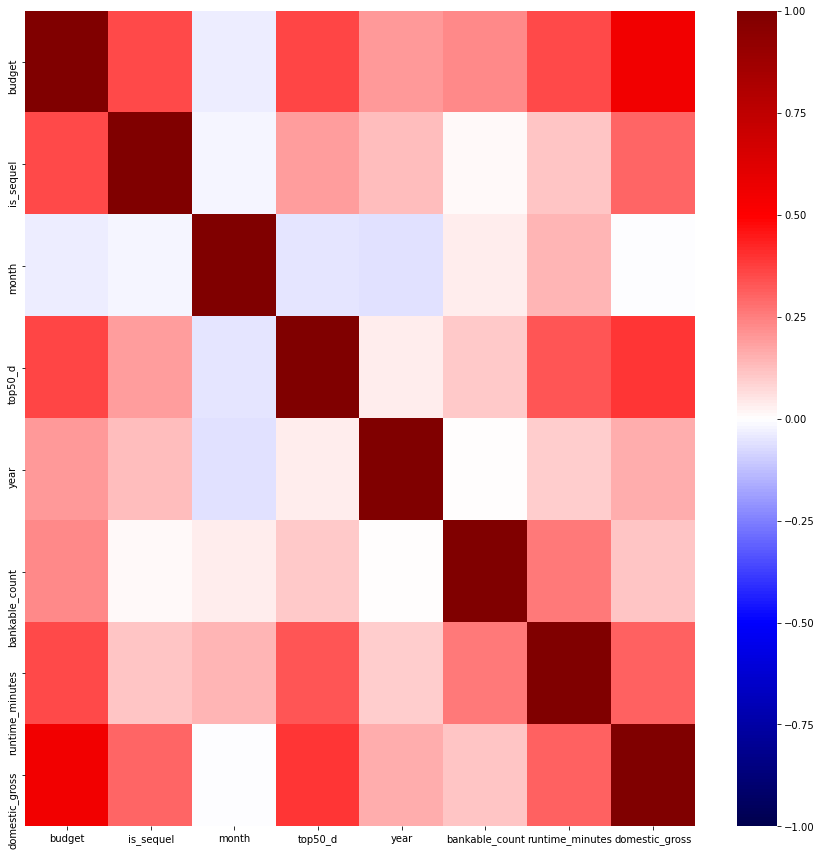

In [1072]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

<ipython-input-1073-0640107250d6>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);


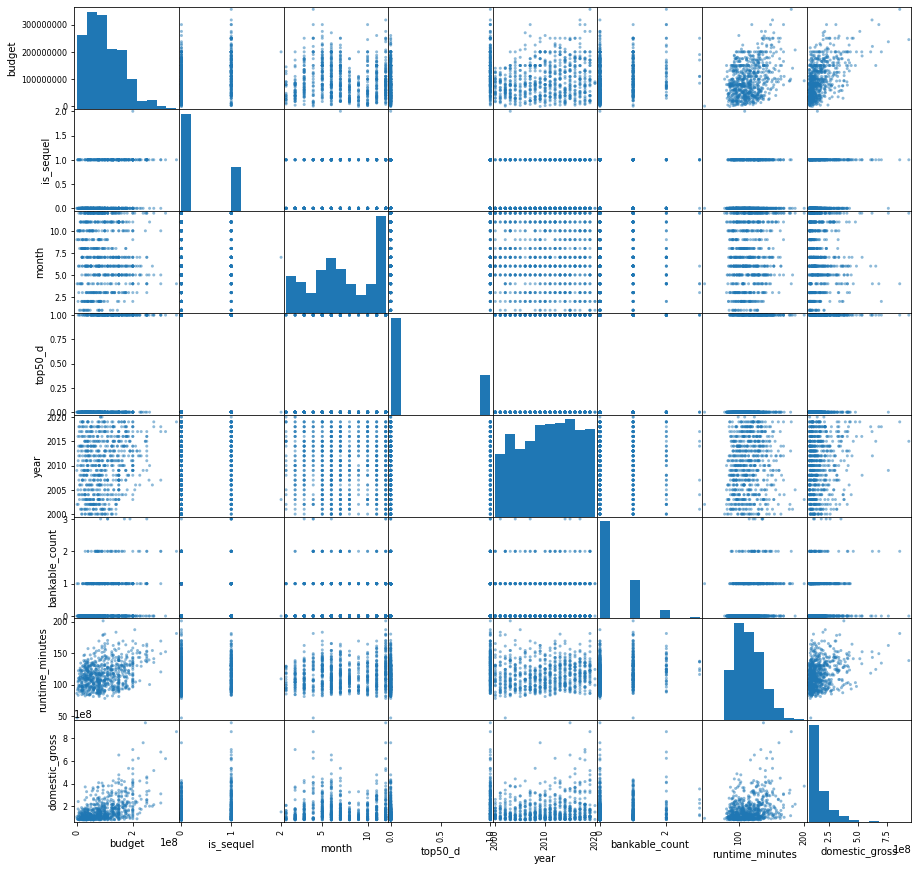

In [1073]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[df1.columns[0:]], ax=ax);

Text(0.5, 1.0, 'Budget versus domestic gross top movies from 2000 to 2020')

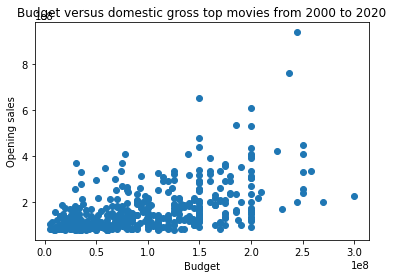

In [1074]:
#fig, ax = plt.subplots(figsize=(9, 7))

budget_x = x_train['budget']
sales_y = y_train

plt.scatter(budget_x, sales_y)
plt.xlabel('Budget')
plt.ylabel('Opening sales')
plt.title('Budget versus domestic gross top movies from 2000 to 2020')

In [1075]:
x = df[['budget','is_sequel','rating','month','top50_d','year','bankable_count','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror','Mystery','Romance']]


y = df['domestic_gross']

x_tr, x_test, y_tr, y_test = train_test_split(x, y,test_size=.2, random_state=5)

In [1076]:
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size=.25, random_state=10)

In [1077]:
y_train

128    233632142
254    167510016
394    127004179
532    102427862
78     296347721
         ...    
471    112735375
500    107509366
183    198542554
572     96854135
456    115171585
Name: domestic_gross, Length: 433, dtype: int64

In [1078]:
x_cont_train = x_train[['budget','is_sequel','top50_d','year','bankable_count','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror','Mystery','Romance']]
x_cont_val = x_val[['budget','is_sequel','top50_d','year','bankable_count','runtime_minutes','Action','Adventure','Animation','Comedy','Drama','Horror','Mystery','Romance']]
#x_cont_test = x_test[['budget','is_sequel','dd_top5','top50_d','genre_top3','month','year']]

In [1079]:
x_cont_train['BUD2'] = x_train[['budget']]**2
x_cont_val['BUD2'] = x_val[['budget']]**2
#x_cont_test['BUD2'] = x_test[['budget']]**2

<ipython-input-1079-d79357da14b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cont_train['BUD2'] = x_train[['budget']]**2
<ipython-input-1079-d79357da14b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cont_val['BUD2'] = x_val[['budget']]**2


In [1080]:
#x_cont_train['dir_act'] = x_train['top50_d'] * x_train['bankable_count']
#x_cont_val['dir_act'] = x_val['top50_d'] * x_val['bankable_count']
#x_cont_test['BUD2'] = x_test[['budget']]*1.5

In [1081]:
x_cat_train = x_train[['rating','month']]
x_cat_val = x_val[['rating','month']]
#x_cat_test = x_test[['rating']]

In [1082]:
ohe = OneHotEncoder(drop='first', sparse=False)

ohe.fit(x_cat_train)

ohe_x_train = ohe.transform(x_cat_train)

columns = ohe.get_feature_names(['rating','month'])

ohe_x_train_df = pd.DataFrame(ohe_x_train, columns=columns, index=x_cat_train.index)

ohe_x_train_df.head()

,rating_PG,rating_PG-13,rating_R,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
78,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1083]:
ohe_v = OneHotEncoder(drop='first', sparse=False)

ohe_v.fit(x_cat_val)

ohe_x_val = ohe_v.transform(x_cat_val)

columns_v = ohe_v.get_feature_names(['rating','month'])

ohe_x_val_df = pd.DataFrame(ohe_x_val, columns=columns_v, index=x_cat_val.index)

ohe_x_val_df.head()

,rating_PG,rating_PG-13,rating_R,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
96,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1084]:
combo_train_df = pd.concat([x_cont_train, ohe_x_train_df], axis=1)

combo_val_df =  pd.concat([x_cont_val, ohe_x_val_df], axis=1)
combo_val_df.head()

,budget,is_sequel,top50_d,year,bankable_count,runtime_minutes,Action,Adventure,Animation,Comedy,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
96,60000000,0,1,2001,0,90.0,0,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,217000000,1,1,2017,0,154.0,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137,90000000,1,1,2001,0,90.0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,220000000,1,1,2012,2,143.0,1,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,160000000,0,0,2019,1,123.0,1,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1085]:
combo_lr = LinearRegression()

combo_lr.fit(combo_train_df, y_train)

combo_lr.score(combo_val_df, y_val) #R2

y_pred = combo_lr.predict(combo_val_df)
np.sqrt(mean_squared_error(y_val, y_pred))

89678115.65484233

In [1086]:
combo_lr.score(combo_val_df, y_val) #R2

0.4546796877572761

In [1087]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df.columns, combo_lr.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.21
is_sequel : 6057.19
top50_d : -4438.04
year : 383257.78
bankable_count : -5023.48
runtime_minutes : 554321.96
Action : -9045.39
Adventure : -18253.23
Animation : -11248.68
Comedy : -9213.19
Drama : 12807.66
Horror : 4242.22
Mystery : 863.76
Romance : 2770.11
BUD2 : 0.00
rating_PG : -14615.05
rating_PG-13 : -828.37
rating_R : 17098.79
month_2 : 1119.58
month_3 : -969.04
month_4 : 1329.36
month_5 : -2546.19
month_6 : -4349.65
month_7 : -3657.52
month_8 : 2000.76
month_9 : 2225.31
month_10 : 5451.59
month_11 : -337.21
month_12 : -95.24


In [1088]:
combo_train_df_2 = combo_train_df.drop('bankable_count', axis=1)

combo_val_df_2 =  combo_val_df.drop('bankable_count', axis=1)
combo_val_df_2.head()

,budget,is_sequel,top50_d,year,runtime_minutes,Action,Adventure,Animation,Comedy,Drama,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
96,60000000,0,1,2001,90.0,0,1,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,217000000,1,1,2017,154.0,1,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137,90000000,1,1,2001,90.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,220000000,1,1,2012,143.0,1,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,160000000,0,0,2019,123.0,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1089]:
combo_lr2 = LinearRegression()

combo_lr2.fit(combo_train_df_2, y_train)

combo_lr2.score(combo_val_df_2, y_val) #R2

y_pred = combo_lr2.predict(combo_val_df_2)
np.sqrt(mean_squared_error(y_val, y_pred))

89680828.14735971

In [1090]:
combo_lr2.score(combo_val_df_2, y_val) #R2

0.45464669866900054

In [1091]:
print('Feature coefficient results: \n')
for feature, coef in zip(combo_train_df_2.columns, combo_lr2.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.21
is_sequel : 5380.82
top50_d : -4247.22
year : 375581.48
runtime_minutes : 554772.17
Action : -8262.11
Adventure : -18005.10
Animation : -11368.01
Comedy : -9526.74
Drama : 12643.09
Horror : 3870.72
Mystery : 935.54
Romance : 2285.19
BUD2 : 0.00
rating_PG : -14731.59
rating_PG-13 : -494.30
rating_R : 16936.51
month_2 : 967.79
month_3 : -955.31
month_4 : 1404.84
month_5 : -2365.66
month_6 : -4398.85
month_7 : -3541.33
month_8 : 1760.06
month_9 : 2141.21
month_10 : 5411.67
month_11 : -272.43
month_12 : 37.70


In [1092]:
import scipy.stats as stats
x1 = df[['budget']]
y1 = df['domestic_gross']
x1

,budget
0,245000000
1,356000000
2,237000000
3,200000000
4,300000000
...,...
718,60000000
719,25000000
720,25000000
721,110000000


In [1093]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x1,y)
    pred = rgr.predict(x1)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

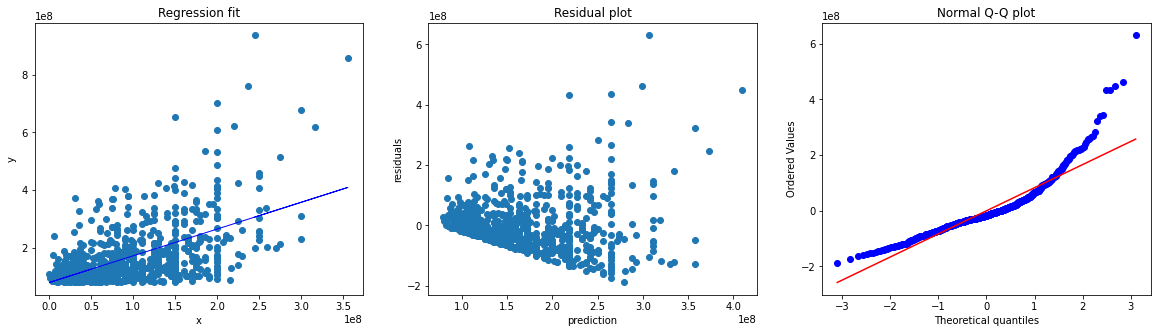

In [1094]:
diagnostic_plot(x1, y1)

In [1095]:
x_budget_train = x_train[['budget']]
x_budget_val = x_val[['budget']]
x_budget_test = x_test[['budget']]

In [1096]:
b_lr = LinearRegression()

b_lr.fit(x_budget_train, y_train)

b_lr.score(x_budget_val, y_val) #R2

y_pred = b_lr.predict(x_budget_val)
np.sqrt(mean_squared_error(y_val, y_pred))

97328915.5094579

In [1097]:
b_lr.score(x_budget_val, y_val) #R2

0.35766365683765244

In [1103]:
x_budget_train['b2'] = x_budget_train['budget']**2
x_budget_val['b2'] = x_budget_val['budget']**2

<ipython-input-1103-154c5e5295c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_budget_train['b2'] = x_budget_train['budget']**2
<ipython-input-1103-154c5e5295c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_budget_val['b2'] = x_budget_val['budget']**2


In [1104]:
x_budget_train.head()

,budget,b2
128,90000000,8100000000000000
254,80000000,6400000000000000
394,50000000,2500000000000000
532,34000000,1156000000000000
78,125000000,15625000000000000


In [1105]:
b_lr = LinearRegression()

b_lr.fit(x_budget_train, y_train)

b_lr.score(x_budget_val, y_val) #R2

y_pred = b_lr.predict(x_budget_val)
np.sqrt(mean_squared_error(y_val, y_pred))

91263547.88702409

In [1106]:
b_lr.score(x_budget_val, y_val) #R2

0.43522765516896855

In [1107]:
print('Feature coefficient results: \n')
for feature, coef in zip(x_budget_train.columns, b_lr.coef_):
        print(feature, ':', f'{coef:.2f}')

Feature coefficient results: 

budget : 0.21
b2 : 0.00
